In [ ]:
%matplotlib inline
import tensorflow as tf
from my_tf_layer import *
from PIL import Image
import numpy as np

from time import gmtime,strftime

from convNet import *

seed = 15  # random seed
random.seed(seed)

net= convNet()

#net.build_graph()


net.init_session()



layer: conv1_1  size: (1, 512, 512, 64)
layer: conv1_2  size: (1, 512, 512, 64)
layer: conv1_3  size: (1, 512, 512, 128)
layer: pool1  size: (1, 256, 256, 64)
layer: conv2_1  size: (1, 256, 256, 64)
layer: conv2_2  size: (1, 256, 256, 128)
layer: conv2_3  size: (1, 256, 256, 128)
layer: pool2  size: (1, 128, 128, 128)
layer: conv3_1  size: (1, 128, 128, 64)
layer: conv3_2  size: (1, 128, 128, 128)
layer: conv3_3  size: (1, 128, 128, 128)
layer: unpool2  size: Tensor("unpool2/Shape:0", shape=(4,), dtype=int32, device=/device:GPU:0)
layer: conv4_1  size: (1, 256, 256, 64)
layer: conv4_2  size: (1, 256, 256, 128)
layer: conv4_3  size: (1, 256, 256, 128)
layer: unpool1  size: Tensor("unpool1/Shape:0", shape=(4,), dtype=int32, device=/device:GPU:0)
layer: conv5_1  size: (1, 512, 512, 64)
layer: conv5_2  size: (1, 512, 512, 128)
layer: conv5_3  size: (1, 512, 512, 128)
layer: conv5_4  size: (1, 512, 512, 64)
layer: score  size: (1, 512, 512, 2)
loghts size:  (262144, 2)
cross entropy size:  

In [ ]:
train_list = '/home/qinshuo/WorkPlace/caffe_space/seg_spine/spine_list/train_list.txt'
path = '/media/D/SpineDataset/spine_seg'
train_data = []
with open(train_list,'r') as ff:
    for line in ff:
        train_data.append([path+vv for vv in line.split()])
print train_data[0]


for iter in range(100):
    idx = random.randint(0, len(train_data)-1)
    rotate = random.randint(0,360)
    crop_size = 512
    batch_xs = read_image(train_data[idx][0],size=crop_size)
    batch_ys = read_label(train_data[idx][1],size=crop_size)
    net.feed_data(batch_xs,batch_ys)
    if iter%5 == 0:
        print 'accuracy is '.format(net.feed_data(batch_xs,batch_ys,info=True))
    
net.save_checkpoint('checkpoint/tmp.ckpt')

['/media/D/SpineDataset/spine_seg/image/AKa21.jpg', '/media/D/SpineDataset/spine_seg/label/AKA2_mask1.png']
0.600609
accuracy is 
0.611649
accuracy is 
0.619926
accuracy is 
0.629494
accuracy is 
0.641979
accuracy is 
0.653038

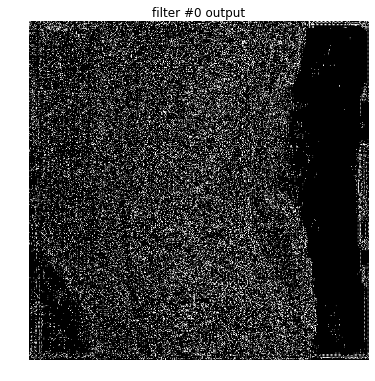

In [4]:
batch_xs = read_image(train_data[10][0],size=crop_size)

pred = net.predict(batch_xs)

show_image(pred)